# Przewidywanie, czy dany klient jest skłonny do założenia lokaty w banku na podstawie informacji o nim oraz statystyk rozmowy telefonicznej.

# Importowanie bibliotek do obsługi danych oraz ich wizualizacji

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych z plików csv

In [2]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
train.head(50)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,60,services,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes
1,1,25,student,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes
2,2,38,services,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no
3,3,40,management,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes
4,4,39,technician,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no
5,5,36,management,married,tertiary,no,2987,yes,no,cellular,12,aug,307,1,-1,0,unknown,yes
6,6,40,entrepreneur,married,tertiary,no,1953,yes,no,unknown,6,jun,112,5,-1,0,unknown,no
7,7,51,services,single,secondary,no,513,yes,no,cellular,29,jul,331,2,-1,0,unknown,no
8,8,51,retired,married,primary,no,1495,no,no,telephone,25,jul,1946,4,-1,0,unknown,yes
9,9,38,management,single,tertiary,no,6836,yes,no,unknown,29,may,374,4,-1,0,unknown,no


# Wizualizacja danych

Dobrą stroną do czerpania inspiracji jest python-graph-gallery.com

### Porównanie ilościowe osób, które wyraziły chęci na lokatę i tych, którzy nie

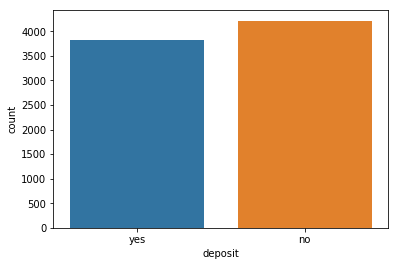

In [3]:
sns.countplot("deposit", data = train)

### Porównanie liczebności i odpowiedzi dla osób o różnym statusie cywilnym

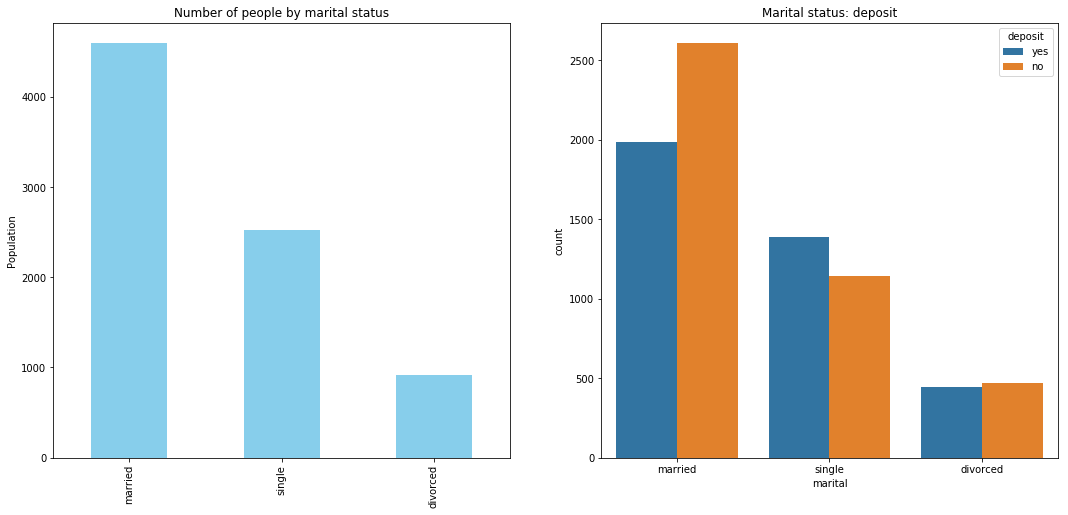

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train["marital"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number of people by marital status")
ax[0].set_ylabel("Population")
sns.countplot("marital", hue = "deposit", data = train, ax = ax[1])
ax[1].set_title("Marital status: deposit")
plt.show()

### Rozkład wieku grupy treningowej
Oś Y reprezentuje jaka część grupy znajduje się w danym przedziale wiekowym, distplot chyba nie usdostępnia podpisu tej osi.

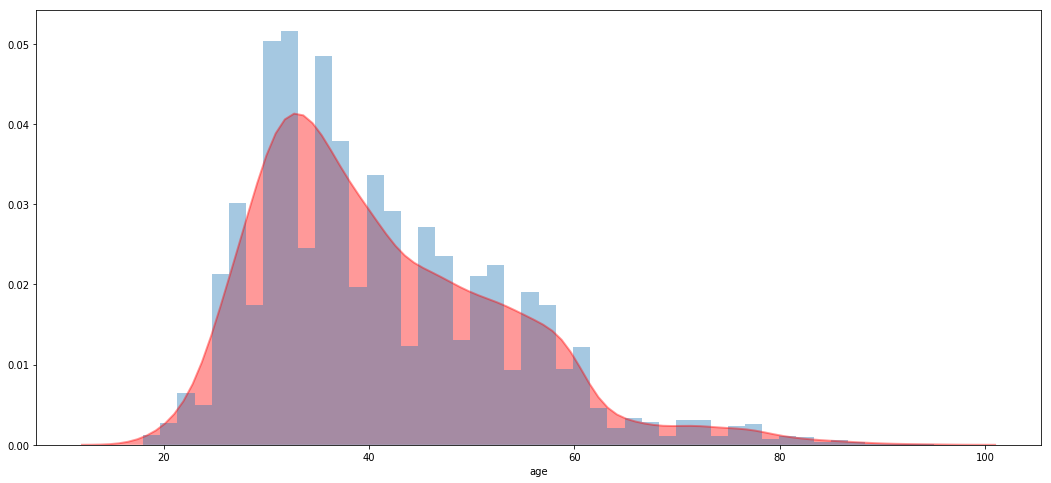

In [5]:
fig, ax = plt.subplots(figsize=[18,8])
sns.distplot(ax = ax,
             a = train["age"],
             kde = True,
             kde_kws = {"color": "r", "alpha":0.4, "linewidth": 2, "shade":True })

### Ciekawa funkcja do szukania zależności pomiędzy różnymi kolumnami danych liczbowych, na zasadzie "wszystko od wszystkiego"
Nieco mało czytelne wykresy ze względu na skalę, szczególnie na małych ekranach, natomiast dobrze nadaje się do próby znalezienia zależności, ponieważ nie trzeba rysować wszystkiego po kolei.

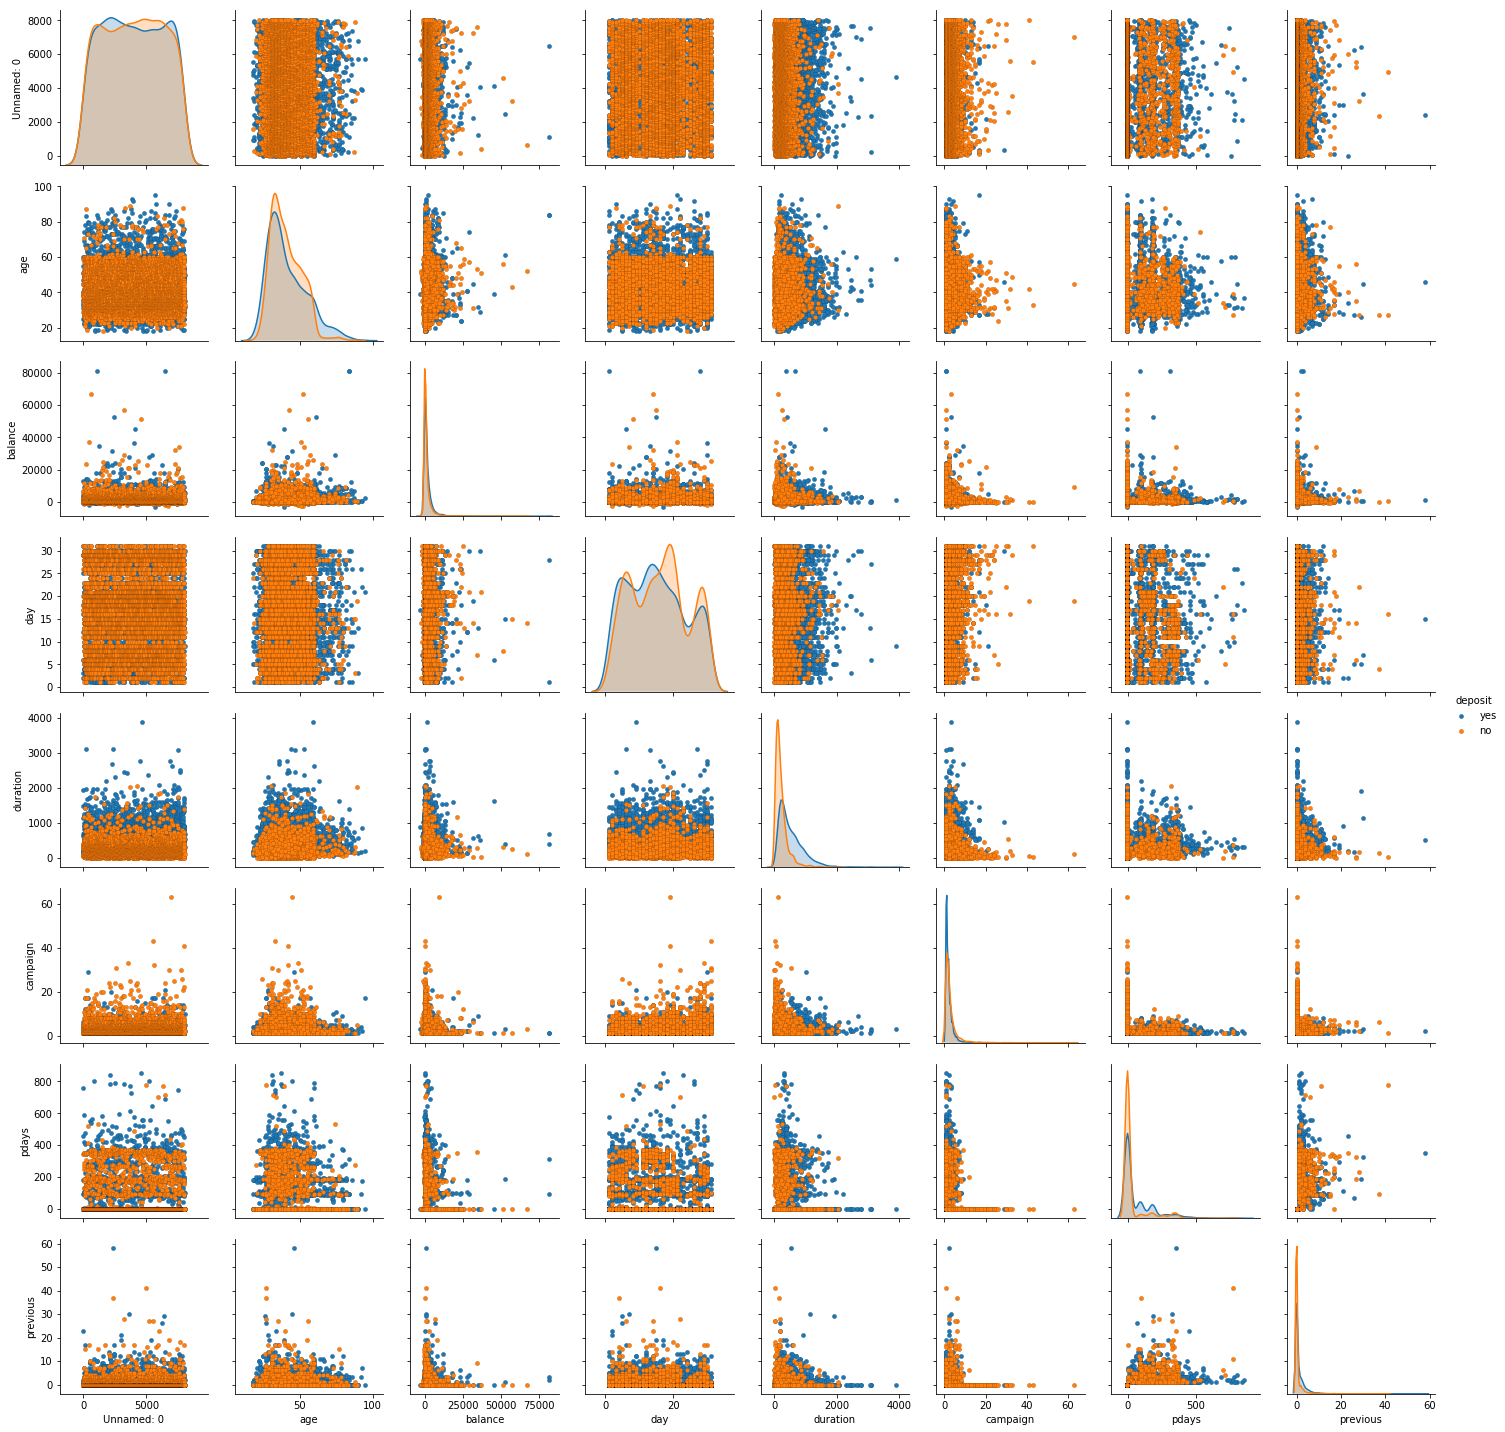

In [6]:
sns.pairplot(train, kind="scatter", hue="deposit", plot_kws=dict(s=20, edgecolor="black", linewidth=0.1))
plt.show()

# Preparowanie danych pod uczenie maszynowe
Algorytmy nie działają dla wartości nieliczbowych.
Trzeba podzielić również zbiory testowy i walidacyjny na dwie części każdy: jedna zawiera dane, na podstawie których algorytmy będą przewidywać odpowiedzi, druga same odpowiedzi.

In [7]:
def prepare_data(zbior_danych):
    
    mapping0 = {'services': 1, 'student': 2, 'management': 3, 'technican': 4, 'entrepreneur': 5, 'retired': 6, 'retired': 7, 'blue-collar': 8, 'admin.': 9, 'housemaid': 10, 'unemployed': 11, 'self-employed': 12, 'technician': 13, 'unknown': 14}
    mapping1 = {'married': 1, 'divorced': 2, 'single': 3, 'unknown': 14}
    mapping2 = {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown':0}
    mapping3 = {'yes': 1,'no':0, 'unknown': 14}
    mapping4 = {'yes': 1,'no':0, 'unknown': 14}
    mapping5 = {'yes': 1,'no':0, 'unknown': 14}
    mapping6 = {'cellular': 1, 'telephone': 2, 'unknown': 14}
    mapping7 = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12, 'unknown': 14}
    mapping8 = {'yes': 1,'no':0, 'unknown': 14}
    mapping9 = {'success': 1, 'failure': 2, 'other': 3, 'failure': 4, 'unknown': 5}
    
    zbior_danych = zbior_danych[zbior_danych['deposit'] != "unknown"]
    zbior_wynikowy=zbior_danych.replace({'job': mapping0,
                     'marital': mapping1,
                     'education': mapping2,
                     'default': mapping3,
                     'housing': mapping4,
                     'loan': mapping5,
                     'contact': mapping6,
                     'month': mapping7,
                     'deposit': mapping8,
                     'poutcome': mapping9})
    #opuszczanie kolumny z numerem porządkowym
    #zbior_wynikowy = zbior_wynikowy.drop("Unnamed: 0", axis = 1)
    return zbior_wynikowy

train = prepare_data(train)
valid = prepare_data(valid)

In [8]:
train.head(50)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,60,1,1,3,0,4256,1,0,1,16,8,239,3,761,1,3,1
1,1,25,2,3,2,0,154,0,0,1,3,3,141,1,180,2,4,1
2,2,38,1,1,2,0,507,1,0,1,17,4,55,1,344,1,4,0
3,3,40,3,3,3,0,1361,0,0,1,29,1,1473,1,-1,0,5,1
4,4,39,13,1,2,0,834,1,1,1,20,4,390,1,-1,0,5,0
5,5,36,3,1,3,0,2987,1,0,1,12,8,307,1,-1,0,5,1
6,6,40,5,1,3,0,1953,1,0,14,6,6,112,5,-1,0,5,0
7,7,51,1,3,2,0,513,1,0,1,29,7,331,2,-1,0,5,0
8,8,51,7,1,1,0,1495,0,0,2,25,7,1946,4,-1,0,5,1
9,9,38,3,3,3,0,6836,1,0,14,29,5,374,4,-1,0,5,0


In [9]:
X_train = train.drop("deposit", axis = 1)
y_train = train['deposit'].values
y_train = y_train.reshape(-1, 1)

X_valid = valid.drop("deposit", axis = 1)
y_valid = valid['deposit'].values
y_valid = y_valid.reshape(-1, 1)

# Import bibliotek potrzebnych do uczenia maszynowego

In [10]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics

# Funkcja mająca na celu automatyzację uczenia na podstawie danych

Dwie wersje: bez wypisywania wyniku (dla użycia w pętlach) i z wypisywaniem na ekran. Funkcja dopasowuje algorytm do danych treningowych, a następnie sprawdza skuteczność algorytmu. Zwraca zarówno wagi algorytmu jak i celność jego odpowiedzi.

In [11]:
def my_models(model, X_train, Y_train, X_test, Y_test):
    my_model = model.fit(X_train, Y_train)
    
    #print(my_model.feature_importances_)
    #print(my_model.score(X_train, Y_train))
    
    model_prediction = my_model.predict(X_test)
    acc = metrics.accuracy_score(model_prediction, Y_test)
    
    return acc, my_model

In [12]:
def my_models_print(model, X_train, Y_train, X_test, Y_test):
    my_model = model.fit(X_train, Y_train)
    
    print(my_model.feature_importances_)
    print(my_model.score(X_train, Y_train))
    
    model_prediction = my_model.predict(X_test)
    acc = metrics.accuracy_score(model_prediction, Y_test)
    
    return acc, my_model

# Testy różnych algorytmów uczenia maszynowego

Dla każdego algorytmu schemat działania jest taki sam. Najpierw tworzymy model algorytmu, wtedy też możemy nadać niestandardowe ustawienia. Następnie uruchamiamy powyżej powstałą funkcję, która zawiera zarówno proces uczenia jak i ocenę wyników. Na końcu wyświetlamy skuteczność naszego algorytmu.

## Drzewa decyzyjne

#### Iteracyjne poszukiwania najlepszej konfiguracji
Dla drzew decyzyjnych można próbować tej metody (poniższa próba to ok. 1h obliczeń), dla Random forest i Gradient Boosting okazało się to zbyt czasochłonne.

In [13]:
best_score = 0
best_a = 0
best_b = 0
best_c = 0
best_d = 0

for a in range(20, 130, 5):
    for b in range(20, 130, 5):
        for c in range(2, 100, 3):
            for d in range(1, 10):
                tree_model = tree.DecisionTreeClassifier(max_depth = a,
                                         max_leaf_nodes = b,
                                         min_samples_leaf = c,
                                         random_state = d)

                tree_acc, my_tree = my_models(tree_model, X_train, y_train, X_valid, y_valid)    
                
                if best_score <= tree_acc:
                    best_score = tree_acc
                    best_a = a
                    best_b = b
                    best_c = c
                    best_d = d

print("The accuracy of Decision Tree is", best_score)
print("Parameters: a=",best_a,", b=",best_b,", c=",best_c,", d=",best_d)

The accuracy of Decision Tree is 0.8541562966650075
Parameters: a= 125 , b= 55 , c= 5 , d= 9


Optymalna konfiguracja

In [14]:
tree_model = tree.DecisionTreeClassifier(max_depth = 125,
                                         max_leaf_nodes = 55,
                                         min_samples_leaf = 5,
                                         random_state = 9)

tree_acc, my_tree = my_models_print(tree_model, X_train, y_train, X_valid, y_valid)

print("The accuracy of Decision Tree is", tree_acc)

[0.         0.01484741 0.         0.0025118  0.         0.
 0.01042259 0.03678014 0.00273384 0.10467899 0.06770301 0.13440654
 0.47514349 0.         0.02017613 0.         0.13059607]
0.8577650572424091
The accuracy of Decision Tree is 0.8541562966650075


## Random forest

In [15]:
forest_model = RandomForestClassifier(max_depth = 425,
                                      max_leaf_nodes = 425,
                                      n_estimators = 860,
                                      random_state = 83)

forest_acc, my_forest = my_models_print(forest_model, X_train, y_train.ravel(), X_valid, y_valid)    

print("The accuracy of Random Forest is", forest_acc)

[0.04624218 0.06216501 0.02295361 0.01243336 0.01452609 0.00114765
 0.05841771 0.03446972 0.00812119 0.04979073 0.05414132 0.07486869
 0.40386752 0.02349975 0.04595508 0.028248   0.05915238]
0.9425087108013938
The accuracy of Random Forest is 0.8491786958685913


## Gradient boosting

In [16]:
gradboost_model = GradientBoostingClassifier(learning_rate =  0.067,
                                             max_depth = 5,
                                             max_features = 0.77,
                                             n_estimators = 205,
                                             subsample = 1.0,
                                             random_state = 1)

gradboost_acc, my_gradboost = my_models_print(gradboost_model, X_train, y_train.ravel(), X_valid, y_valid)    

print("The accuracy of Gradient Boosting is", gradboost_acc)

[0.02016894 0.04083693 0.00622003 0.00370605 0.0064773  0.00105484
 0.03118594 0.04113949 0.0054366  0.06863315 0.05672198 0.10734383
 0.44901541 0.01197071 0.0333384  0.01766481 0.09908561]
0.9140119462419114
The accuracy of Gradient Boosting is 0.8700846192135391


## Extreme gradient boosting

In [17]:
xgb_model = XGBClassifier(learning_rate = 0.29)

xtremegradboost_acc, my_xtremegradboost = my_models_print(xgb_model, X_train, y_train.ravel(), X_valid, y_valid)    

print("The accuracy of EXTREME Gradient Boosting is", xtremegradboost_acc)

[0.07634731 0.08083832 0.02095808 0.00898204 0.01796407 0.00299401
 0.09580839 0.02095808 0.00748503 0.04191617 0.11077844 0.16317365
 0.20808384 0.03892216 0.07035928 0.01047904 0.0239521 ]
0.8865107018417123
The accuracy of EXTREME Gradient Boosting is 0.8646092583374814


### Gradient Boosting spośród 4 powyższych metod dał najlepszy rezultat: 0.8700846192135391
Niemniej, wszystkie prezentują przy odpowiednich ustawieniach podobną skuteczność, tutaj nieco ponad 2% rozrzutu, a parametry prawdopodobnie w każdym przypadku da się poprawić.

# Krótkie wnioski z obserwacji wag algorytmów

Wszystkie algorytmy największą wagę nadały czasowi trwania rozmowy, jest to zrozumiałe ponieważ zainteresowany klient na ogół nie będzie dążył do jak najwcześniejszego zakończenia rozmowy, w przeciwieństwie do klienta niezainteresowanego.

Natomiast to co wydaje się nie mieć sensu, to fakt, że wszystkie algorytmy poza drzewami decyzyjnymi korzystają z liczby porządkowej, nadając jej wagę większą niż niektórym pozostałym faktom. Jednak usunięcie tej kolumny pogarsza wyniki w metodach gradientowych (przy niezmienionych parametrach uczenia).